<a href="https://colab.research.google.com/github/carloscariello/Inad_PJ_-pequeno_porte-_Financ_Exportacao/blob/main/analise_taxa_inadimplencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definindo os parâmetros da API
codigo_serie = 27242  # Substitua pelo código da série desejada
data_inicial = "01/01/2010"
data_final = "31/12/2016"

In [4]:

# Construindo a URL da API
api_url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}"
# Fazendo a requisição dos dados JSON
response = requests.get(api_url)
response

<Response [200]>

In [12]:
# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    json_data = response.json()
    
    # Convertendo os dados JSON em um DataFrame
    data = pd.DataFrame(json_data)
else:
  print("Erro ao obter os dados JSON:", response.status_code)

data.head()


,data,valor
0,01/01/2012,0.7
1,01/04/2012,0.9
2,01/07/2012,0.0
3,01/10/2012,0.0
4,01/01/2013,0.0


In [13]:
data['data'] = pd.to_datetime(data['data'], format='%d/%m/%Y')
data['valor'] = data['valor'].astype(float)

data.head()

,data,valor
0,2012-01-01,0.7
1,2012-04-01,0.9
2,2012-07-01,0.0
3,2012-10-01,0.0
4,2013-01-01,0.0


In [14]:
# Calculando estatísticas
media = data['valor'].mean()
maximo = data['valor'].max()
minimo = data['valor'].min()
data_maximo = data.loc[data['valor'] == maximo, 'data'].values[0]
data_minimo = data.loc[data['valor'] == minimo, 'data'].values[0]

In [19]:
# Exibindo estatísticas
print(f'Média da taxa de inadimplência: {media:.2f}%')
print(f'Taxa de inadimplência máxima: {maximo}% em {data.loc[data["valor"] == maximo, "data"].dt.to_pydatetime()[0].strftime("%d/%m/%Y")}')
print(f'Taxa de inadimplência mínima: {minimo}% em {data.loc[data["valor"] == minimo, "data"].dt.to_pydatetime()[0].strftime("%d/%m/%Y")}')


Média da taxa de inadimplência: 1.44%
Taxa de inadimplência máxima: 24.0% em 01/01/2014
Taxa de inadimplência mínima: 0.0% em 01/07/2012


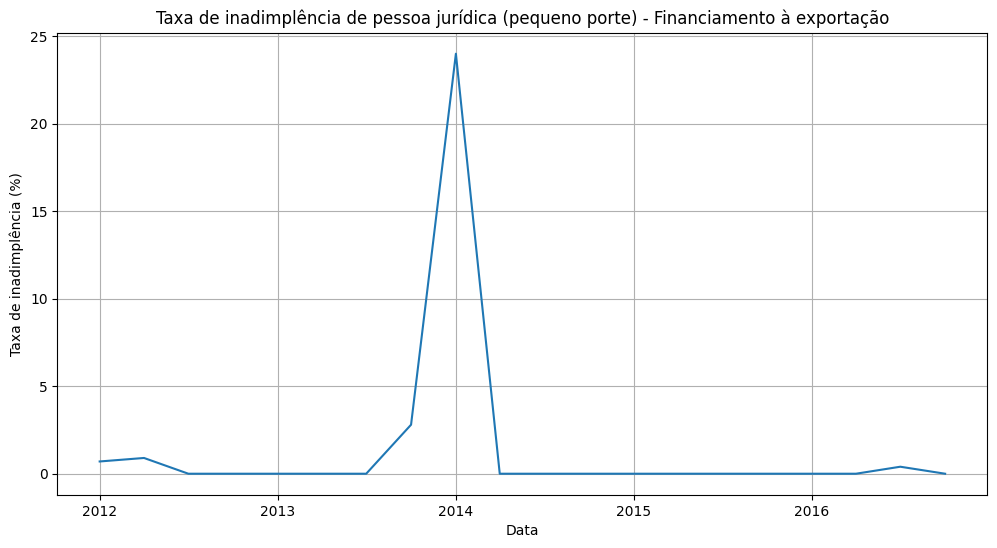

In [20]:
# Plotando gráfico de linha da taxa de inadimplência
plt.figure(figsize=(12, 6))
plt.plot(data['data'], data['valor'])
plt.title('Taxa de inadimplência de pessoa jurídica (pequeno porte) - Financiamento à exportação')
plt.xlabel('Data')
plt.ylabel('Taxa de inadimplência (%)')
plt.grid(True)
plt.show()